In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm

def plot_regression_by_year_statsmodels(data, date_col, x_col, y_col):
    data = data.dropna()
    # Convert the date column to datetime and extract the year
    data[date_col] = pd.to_datetime(data[date_col])
    data['year'] = data[date_col].dt.year
    
    # Group data by year
    grouped = data.groupby('year')

    # Prepare for scatter plot with regression lines
    plt.figure(figsize=(12, 6))
    colors = plt.cm.rainbow(np.linspace(0, 1, len(grouped)))

    # Initialize table for slope and r2 values
    table_data = []

    for i, (year, group) in enumerate(grouped):
        # Linear regression
        X = group[x_col].values
        X = sm.add_constant(X)  # Add a constant term for the intercept
        y = group[y_col].values
        model = sm.OLS(y, X).fit()
        y_pred = model.predict(X)

        # Scatter plot
        plt.scatter(X[:, 1], y, color=colors[i], label=year, alpha=0.7)
        plt.plot(X[:, 1], y_pred, color=colors[i], linewidth=2)

        # Add slope and r2 to the table
        slope = model.params[1]
        r2 = model.rsquared
        table_data.append([year, slope, r2])

    # Display scatter plot with regression lines
    plt.xlabel(x_col.capitalize())
    plt.ylabel(y_col.capitalize())
    plt.title(f'{y_col.capitalize()} vs {x_col.capitalize()} by Year')
    plt.legend()
    plt.show()

    # Display table of slope and r2 values
    table_df = pd.DataFrame(table_data, columns=["Year", "Slope", "R2"])
    print(table_df)

# Example usage:
# plot_regression_by_year_statsmodels(df, 'date_column_name', 'x_column_name', 'y_column_name')





In [34]:
df = pd.read_csv('train_data.csv')

C:\Users\JCKou\AppData\Local\Temp\ipykernel_9496\3284543613.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[date_col] = pd.to_datetime(data[date_col])
C:\Users\JCKou\AppData\Local\Temp\ipykernel_9496\3284543613.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['year'] = data[date_col].dt.year


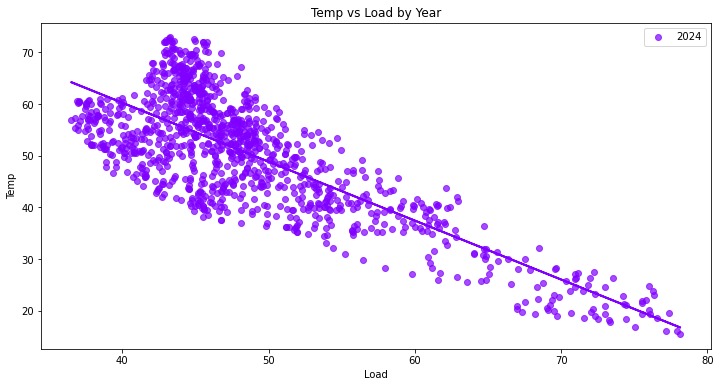

   Year     Slope        R2
0  2024 -1.140035  0.613436


In [35]:
plot_regression_by_year_statsmodels(df,'date','Load','Temp')